In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1891,ham,Probably earlier than that if the station's wh...,NaN,NaN,NaN
2551,ham,I'm done. C Ì_ there.,NaN,NaN,NaN
559,ham,Aiyo... U always c our ex one... I dunno abt m...,NaN,NaN,NaN
5333,ham,Neither [in sterm voice] - i'm studying. All f...,NaN,NaN,NaN
1355,ham,Convey my regards to him,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#data cleaning
#EDA
#Text preprocessing
#Model building
#Evaluation 
#Improvement 
#Website
#Deploy

# Data Cleaning

In [6]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [7]:
# drop last three columns 
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True )

In [8]:
df.sample(2)

,v1,v2
3911,spam,You have an important customer service announc...
4002,ham,somewhere out there beneath the pale moon ligh...


In [9]:
#renaming column 
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [10]:
df.sample(2)

,Target,Text
2992,ham,So i'm doing a list of buyers.
5194,ham,Ok... Take ur time n enjoy ur dinner...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.sample(2)

,Target,Text
1217,0,"Damn, can you make it tonight or do you want t..."
1840,0,Yeah. I got a list with only u and Joanna if I...


In [13]:
# MISSING VALUES
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
#check for duplicates
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [16]:
df.shape

(5169, 2)

# EDA(Exploratory data Analysis)

In [17]:
df.value_counts(df['Target'])

Target
0    4516
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

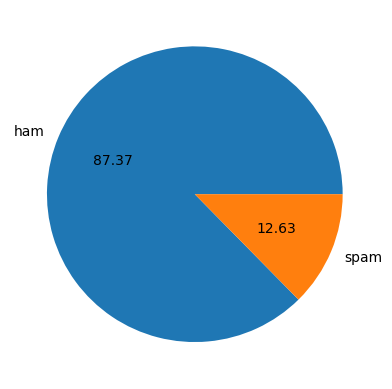

In [19]:
plt.pie(df['Target'].value_counts(),  labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [20]:
# data is imbalanced

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/akuppal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['Text'].apply(len)

/var/folders/9z/j_77zkyn7dd0jl94s7_nzzhm0000gn/T/ipykernel_62472/3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [23]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# fetch number of words 
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

/var/folders/9z/j_77zkyn7dd0jl94s7_nzzhm0000gn/T/ipykernel_62472/147733683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [25]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/9z/j_77zkyn7dd0jl94s7_nzzhm0000gn/T/ipykernel_62472/3982308346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham messages
df[df['Target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam messages
df[df['Target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

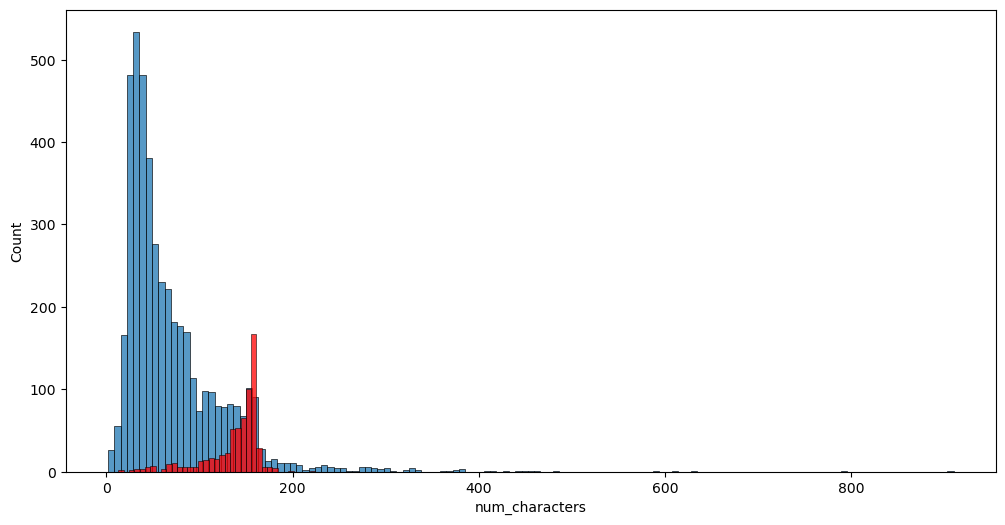

In [31]:
plt.figure(figsize = (12,6))
import seaborn as sns
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

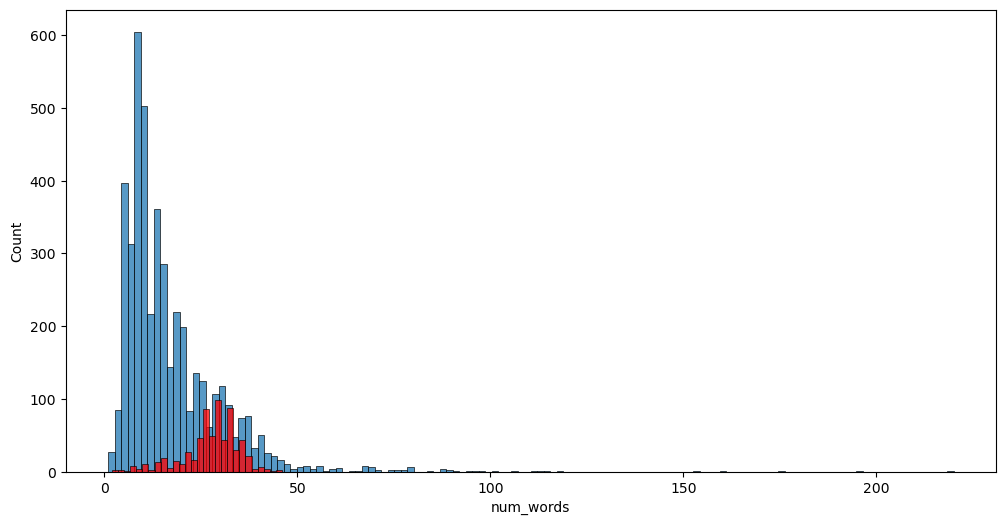

In [32]:
plt.figure(figsize = (12,6))
import seaborn as sns
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color = 'red')

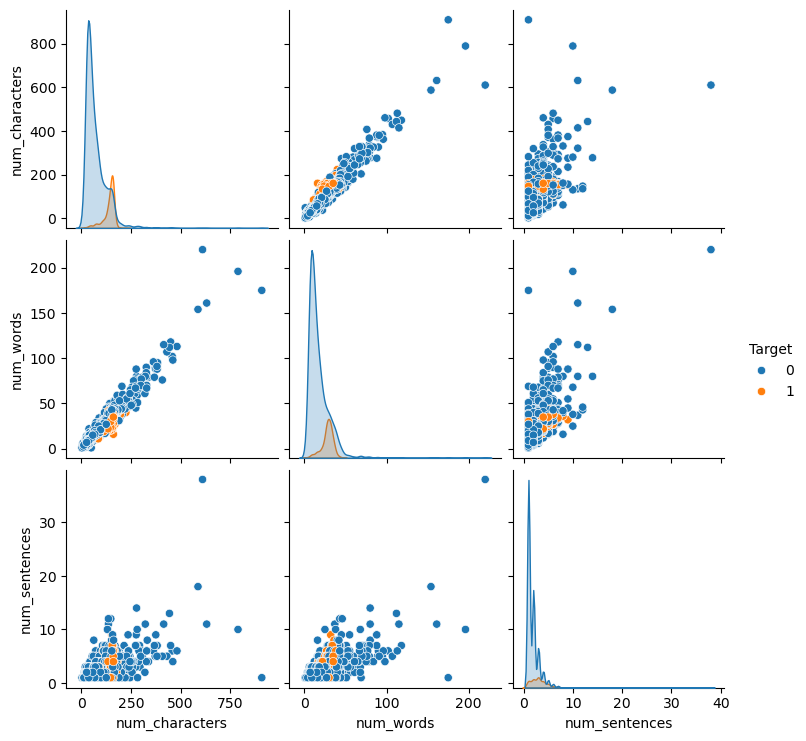

In [33]:
sns.pairplot(df, hue = 'Target')

# Data Preprocessing 
##### 1. lower case
##### 2. Tokenization 
##### 3. Remove Special Characters
##### 4. Remove Stop words and punctuation 
##### 5. Stemming 

In [34]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df["transformed_text"] = df["Text"].apply(transform_text)

/var/folders/9z/j_77zkyn7dd0jl94s7_nzzhm0000gn/T/ipykernel_62472/3335711490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df["Text"].apply(transform_text)


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width = 50, height = 50,min_font_size = 10,background_color='white' )

In [44]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep = " "))

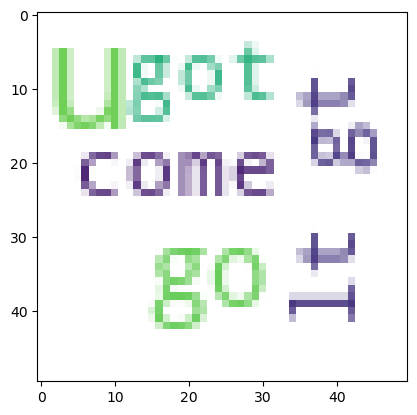

In [49]:
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep = " "))


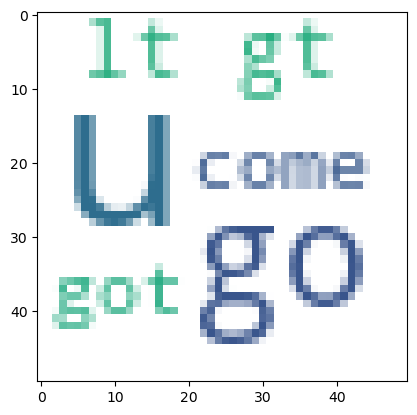

In [51]:
plt.imshow(ham_wc)

In [83]:
spam_corpus = []
for message in df[df['Target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [84]:
len(spam_corpus)

9939

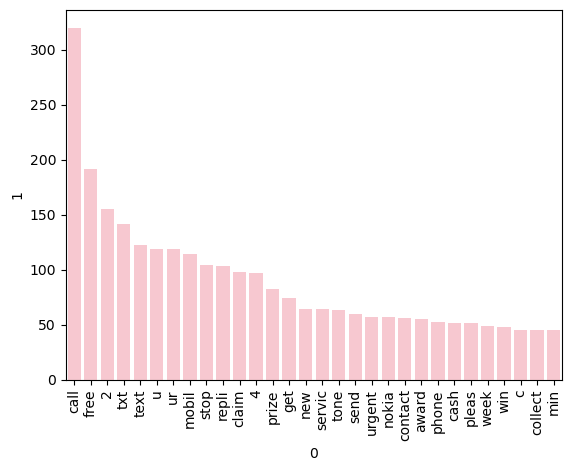

In [95]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color = 'pink')
plt.xticks(rotation = 'vertical')
plt.show()

In [108]:
ham_corpus = []
for message in df[df['Target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [109]:
len(spam_corpus)

151555

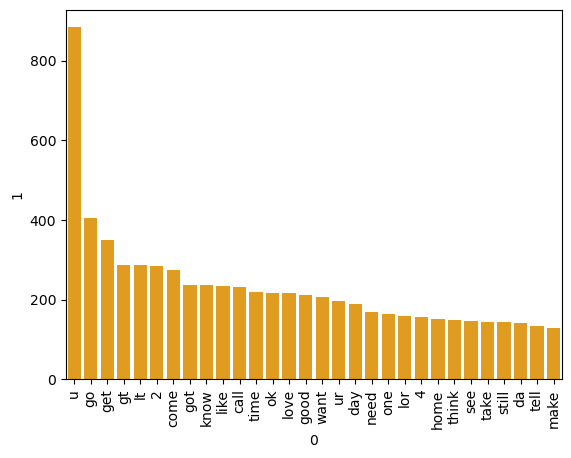

In [110]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color = 'orange')
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [162]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features= 3000)
X = tf.fit_transform(df['transformed_text']).toarray()

In [163]:
X.shape

(5169, 3000)

In [164]:
y = df['Target'].values

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [166]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [167]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [168]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [169]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [170]:
# here precision score matters the most and using tfidf and mnb precision score is the highest hence we will use this

In [171]:
import pickle as pkl
pkl.dump(tf,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('model.pkl','wb'))